## Morphological Operations:
When thresholding is applied to an image, the objects in the binary image can be distorted by noise and texture. We can use morphological operations to remove the imperfections by manipulating the shape of the objects. These operations use a <b>structuring element</b> to transform each pixel's value to a desired value based on it's neighboring pixel values. Just like we move a little magnifying glass on a piece of paper to make objects appear bigger, we can use a structuring element which is a 2-D array that goes through the pixels and filters them according to our preferences.   

We will focus on four morphological operations:
- Erosion: Removes pixels from the boundaries of objects in an image. It removes islands and small objects, so only key elements remain.
- Dilation: Adds pixels to the boundaries of objects in an image, so objects become more visible. It fills in small holes when necessary. 
- Opening: Successive application of erosion and dilation using the same structuring element. Erosion removes random noise and small objects, dilation enhances the objects of interest.
- Closing: Successive application of dilation and erosion using the same structuring element. Closing, as the name implies closes the gaps between objects in the distorted image and gets rid of the small holes.

These operations are applied to binary images but some can be applied to grayscale images as well. 

Let's inspect these operations in more detail:

### Erosion and Dilation:

Let's apply morphological operations <b>erosion</b> and <b>dilation</b> to an <a href=https://en.wikipedia.org/wiki/Bacteria#/media/File:EscherichiaColi_NIAID.jpg>image</a> of bacteria. First, we need to load the image, turn it into a binary image by thresholding. Then use binary_erosion() and binary_dilation() functions from skimage.morphology module.

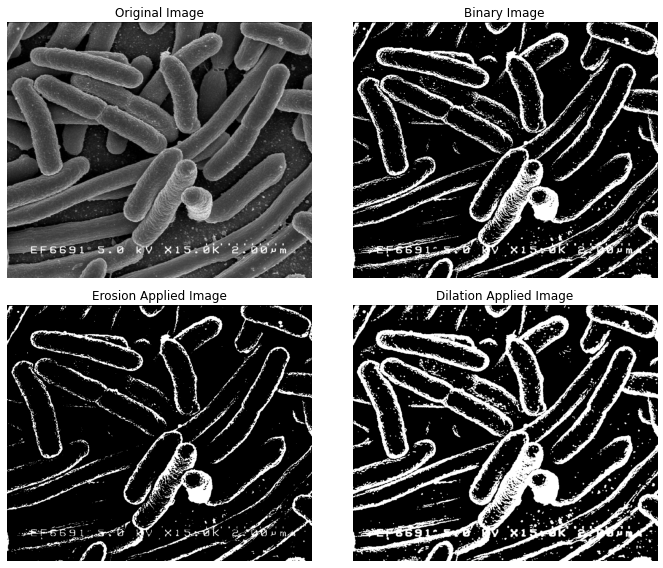

In [1]:
#Import necessary libraries:
import skimage.io
from skimage import morphology
import numpy as np
import matplotlib.pyplot as plt
#Load the original image
original_image = skimage.io.imread('bacteria.jpg')
#Determine a threshold
thresh = original_image > 110
#Create the binary image
binary_image  = np.zeros(shape=original_image.shape)
binary_image[thresh] = 1
#Apply Erosion to the binary image
eroded_image = morphology.binary_erosion(binary_image)
eroded = np.zeros(shape=eroded_image.shape)
eroded[eroded_image] = 1
#Apply Dilation to the binary image
dilated_image = morphology.binary_dilation(binary_image)
dilated = np.zeros(shape=dilated_image.shape)
dilated[dilated_image] = 1
#Plot the original, binary, eroded and dilated images:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10, 8), sharex=True, sharey=True)
ax[0, 0].imshow(original_image)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(binary_image)
ax[0, 1].set_title('Binary Image')
ax[0, 1].axis('off')
ax[1, 0].imshow(eroded)
ax[1, 0].set_title('Erosion Applied Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(dilated)
ax[1, 1].set_title('Dilation Applied Image')
ax[1, 1].axis('off')
plt.tight_layout()

From the results above, we observe that erosion removes unnecessary artifacts from the image. We see that the little dots mainly positioned in the lower-right quadrant of the original image are a lot less prominent in the eroded image. Outlines of objects look slimmer; letters and numbers at the bottom of the image are barely visible.
On the other hand, with the dilation, object lines appear fuller, details are much more detectable and consequently noise too is more prominent. 

### Opening and Closing:
Opening is used when we would like to fill in lighter parts of the image; meaning any bright part that is smaller than the structuring element is turned to a darker color (black in a binary image).

Closing is used when we would like to get rid of the darker colors, meaning any dark part that is smaller than the structuring element is turned to a lighter color (white in a binary image). Closing could be thought of as erasing objects drawn with a black marker 
on a whiteboard. 

In the following, we will apply binary_opening() and binary_closing() functions to this <a href=https://www.vectorstock.com/royalty-free-vector/circle-half-circle-line-pattern-colorful-pastel-vector-13966982> image</a>. 

Text(0.5, 1.0, 'Original Image (Grayscale)')

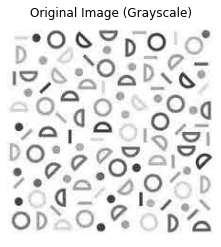

In [2]:
#Load the original image
original_image = skimage.io.imread('lines.jpg', as_gray=True)
plt.imshow(original_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original Image (Grayscale)')

So far, we didn't specify a structuring element when using the morphological operations. We were content with the default diamond shaped 2D array that came with the erosion() or dilation() functions. Now, we will use a disk shaped structuring element with a radius of 3. Our goal is to get rid of all the elements other than the black dots by using binary_closing() function. We will also observe the differences made by binary_opening() function.

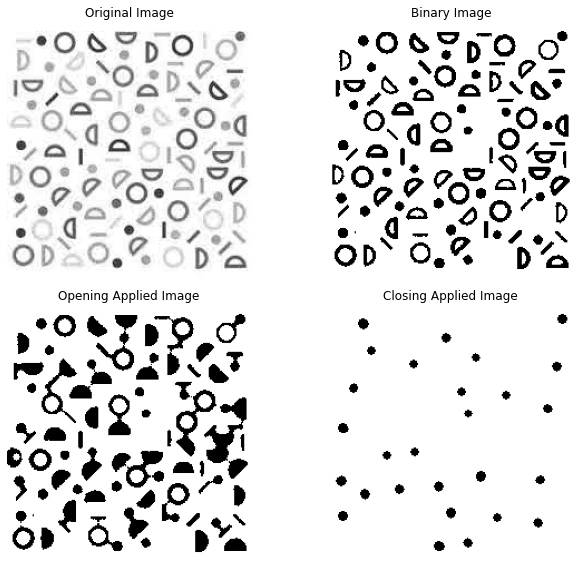

In [3]:
#Denoise the image and determine a threshold
blurred_image = skimage.filters.gaussian(original_image, sigma=0.5)
thresh = blurred_image > 0.9
#Create the binary image
binary_image  = np.zeros(shape=original_image.shape)
binary_image[thresh] = 1
#Create the structuring element
disk = morphology.disk(3)
#Apply opening with the disk shaped element
opened_image = morphology.binary_opening(binary_image, selem=disk)
opened = np.zeros(shape=opened_image.shape)
opened[opened_image] = 1
#Apply closing with the disk shaped element
closed_image = morphology.binary_closing(binary_image, selem=disk)
closed = np.zeros(shape=closed_image.shape)
closed[closed_image] = 1
#Plot the original, binary, opened and closed images:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10, 8), sharex=True, sharey=True)
ax[0, 0].imshow(original_image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(binary_image,cmap=plt.cm.gray)
ax[0, 1].set_title('Binary Image')
ax[0, 1].axis('off')
ax[1, 0].imshow(opened,cmap=plt.cm.gray)
ax[1, 0].set_title('Opening Applied Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(closed,cmap=plt.cm.gray)
ax[1, 1].set_title('Closing Applied Image')
ax[1, 1].axis('off')
plt.tight_layout()

Since background is white in the binary image, application of <b>opening</b> caused half circles to be filled with black color as expected. Also, even though objects were not touching each other in the original image, some connections were made between them because of their proximity.

We successfully eliminated all the objects except the black dots in the image by applying <b>closing</b> to the image. 



## Exercise: Counting Coins in an Image
In this exercise, we would like to count the coins in this <a href=https://i.ebayimg.com/images/g/MhsAAOSwSQ1gShxE/s-l300.jpg> image</a>. Skimage.measure module has a function called label() that counts objects. We will employ this function, but coins are touching each other. Let us see if label() function can discern them.
First let's load the image, turn it into the binary form:

(-0.5, 299.5, 199.5, -0.5)

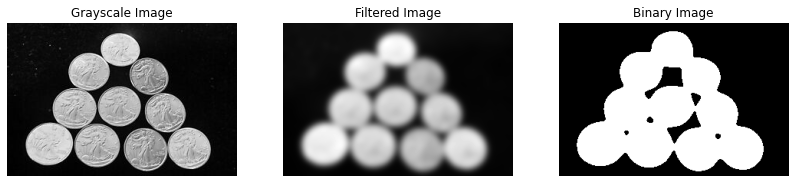

In [4]:
#Load the image into the workspace:
coins = skimage.io.imread('coins.jpg')
#Turn the image to grayscale
gray_coins = skimage.color.rgb2gray(coins)
#Denoise the image
blurred_coins = skimage.filters.gaussian(gray_coins, sigma=4)
#Apply a threshold of 0.3 to the image
threshold=0.3
binary_mask = blurred_coins > threshold
#Create an all zero values array with the same shape as our binary mask
image = np.zeros(shape=binary_mask.shape)
#Apply mask to the array. Only detected objects will be shown as white (value of 1), 
#the rest will be set to black (value of 0)
image[binary_mask]=1
#Plot the grayscale, filtered and binary images:
fig, ax = plt.subplots(ncols=3, figsize=(14,12), sharex=True, sharey=True)
ax[0].imshow(gray_coins, cmap=plt.cm.gray)
ax[0].set_title('Grayscale Image')
ax[0].axis('off')
ax[1].imshow(blurred_coins, cmap=plt.cm.gray)
ax[1].set_title('Filtered Image')
ax[1].axis('off')
ax[2].imshow(image, cmap=plt.cm.gray)
ax[2].set_title('Binary Image')
ax[2].axis('off')

Now that we have the binary image of the coins, let's see if skimage.measure.label() can count them:

In [5]:
label, count = skimage.measure.label(image, return_num=True)
print('There are {} object(s) in the image.'.format(count))

There are 1 object(s) in the image.


Unfortunately, since all coins in the binary image are touching, label() function thinks they are all just one object. What we need to do is to apply <b>erosion</b> to the binary image. This way each coin will be disconnected from others, and counted as an independent object.  

Let's see if applying binary_erosion() with the default structuring element is going to work in our case or if we need to specify some other structuring element to the "selem" parameter of the function.

Text(0.5, 1.0, 'Eroded Image \nwith the Regular Element')

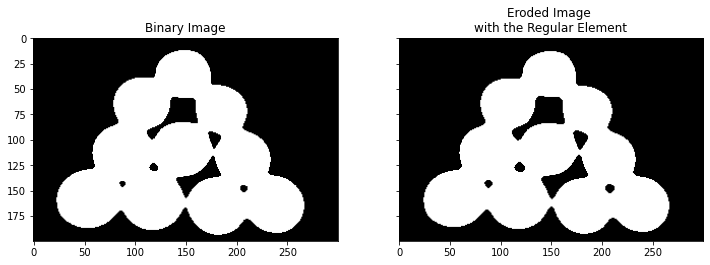

In [6]:
#Apply binary erosion to the image
eroded_regular = skimage.morphology.binary_erosion(image)
eroded_image = np.zeros(shape=eroded_regular.shape)
eroded_image[eroded_regular] = 1
fig, ax = plt.subplots(1, 2, figsize=(12,10), sharey=True)
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Binary Image')
ax[1].imshow(eroded_image, cmap=plt.cm.gray)
ax[1].set_title('Eroded Image \nwith the Regular Element')

We see only a barely detectable improvement. Certainly, this will not provide us with the disconnectivity that is required by the label() function.

Let's try our own structuring element to obtain better results. We will use a disk shaped element with a radius of 16. Anything less than 16 does not work based on previous trials.

Text(0.5, 1.0, 'Eroded Image \nwith Our Structuring Element')

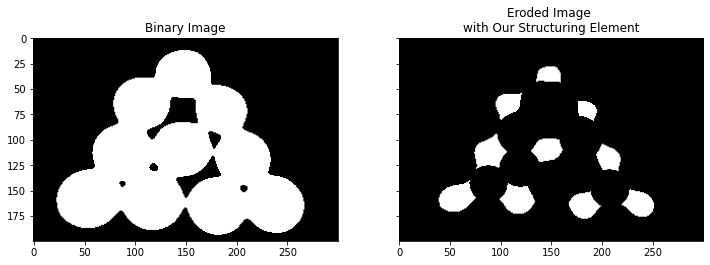

In [9]:
#Create a disk shaped structuring element with a radius of 16.
disk = skimage.morphology.disk(16)
#Apply erosion to the image 
eroded = skimage.morphology.binary_erosion(image, selem=disk)
eroded_image = np.zeros(shape=eroded.shape)
eroded_image[eroded] = 1
#Plot the binary and eroded image
fig, ax = plt.subplots(1, 2, figsize=(12,10), sharey=True)
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Binary Image')
ax[1].imshow(eroded_image, cmap=plt.cm.gray)
ax[1].set_title('Eroded Image \nwith Our Structuring Element')

Although they look nothing like coins anymore, we finally have several distinct objects.

Let see if label() function can count them now:

In [8]:
#Count the objects on the image
label, count = skimage.measure.label(eroded_image, return_num=True)
print('There are {} objects in the image.'.format(count))

There are 10 objects in the image.


We see that applying binary_erosion() function with an appropriate structuring element helped skimage count objects correctly.